# Import dependencies

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import pandas as pd
import numpy as np
import glob

api = KaggleApi()
api.authenticate()

dataset_ref = 'yasserh/breast-cancer-dataset'
download_path = '../data/raw'

os.makedirs(download_path, exist_ok=True)
api.dataset_download_files(dataset_ref, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


### Let's predict whether a breast tumor is malignant or benign based on cell nuclei measurements using Logistic Regression

# EDA

In [2]:
csv_file = glob.glob(os.path.join(download_path, '*.csv'))[0]
df = pd.read_csv(csv_file)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Nulls per column:\n{df.isnull().sum()}")
print(f"\nUnique values per column:\n{df.nunique()}")

Duplicates: 0
Nulls per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Unique values per column:


569 samples with 32 columns: an id, a diagnosis label (M or B), and 30 numeric features computed from digitized images of fine needle aspirates. No nulls, no duplicates, all features are continuous floats. The 30 features are organized in three groups of 10: mean, standard error, and worst (largest) value for each of 10 cell nucleus measurements (radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension). That's a clean dataset, no imputation needed.

Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64
Class ratio (minority/majority): 0.59


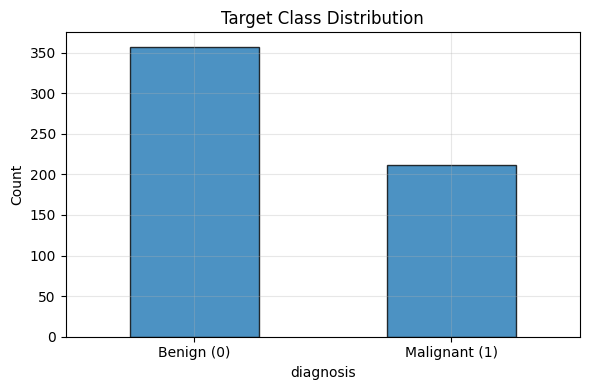

In [6]:
# Encode target: M (malignant) = 1, B (benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

class_counts = df['diagnosis'].value_counts()
print(f"Class distribution:\n{class_counts}")
print(f"Class ratio (minority/majority): {class_counts.min() / class_counts.max():.2f}")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
class_counts.plot(kind='bar', edgecolor='k', alpha=0.8, ax=ax)
ax.set_title('Target Class Distribution')
ax.set_xticklabels(['Benign (0)', 'Malignant (1)'], rotation=0)
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

357 benign vs 212 malignant, so a 0.59 ratio. That's moderately balanced, not severe enough to require SMOTE or class weighting. Stratified splitting will be enough to preserve this ratio in train and test sets.

In [7]:
# Outlier detection
from scipy import stats

X_all = df.drop(columns=['id', 'diagnosis'])
z_scores = np.abs(stats.zscore(X_all))
outlier_rows = (z_scores > 3).any(axis=1)
print(f"Outlier rows (Z > 3): {outlier_rows.sum()} / {len(df)}")

Outlier rows (Z > 3): 74 / 569


74 rows flagged as outliers, that's about 13% of the data. With 30 features, having a Z-score above 3 on at least one feature isn't that unusual. Medical measurements naturally have wide ranges between benign and malignant tumors so these aren't data errors, they're real biological variation. Removing 13% of the dataset would throw away too much signal. Keeping them all.

In [8]:
# Correlation with target (top features)
corr_target = X_all.corrwith(df['diagnosis']).sort_values(ascending=False)
print("Correlation with target (top 10):")
print(corr_target.head(10))

Correlation with target (top 10):
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
dtype: float64


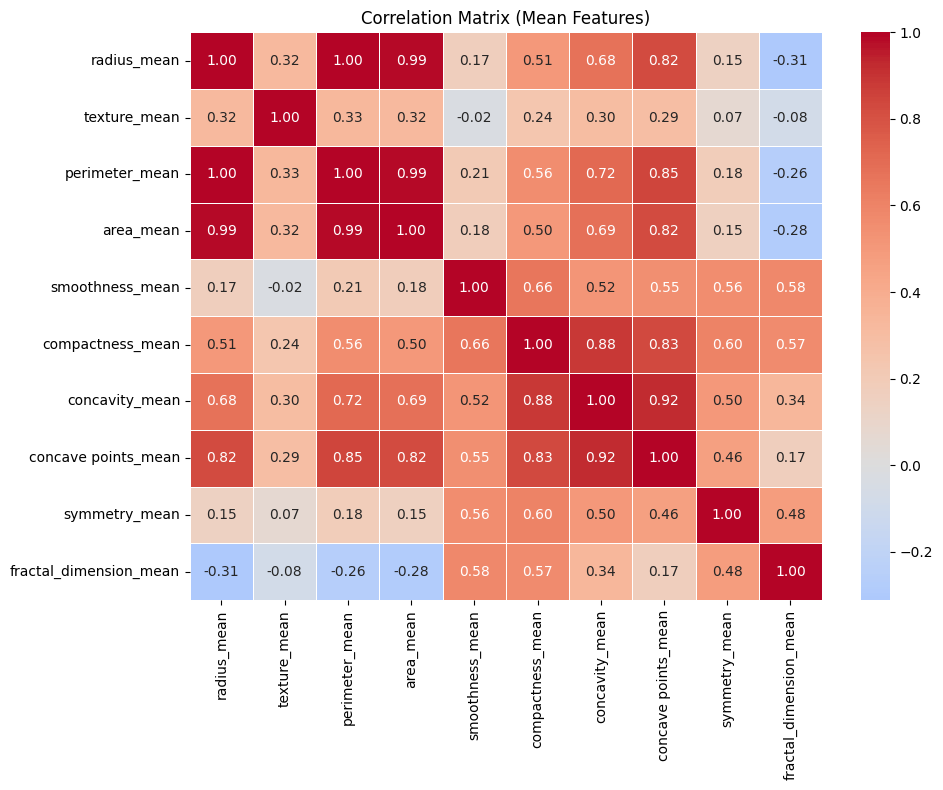

  radius_mean <-> perimeter_mean: 0.998
  radius_mean <-> area_mean: 0.987
  perimeter_mean <-> area_mean: 0.987
  concavity_mean <-> concave points_mean: 0.921


In [9]:
# Correlation heatmap (mean features only for readability)
import seaborn as sns

mean_cols = [c for c in X_all.columns if c.endswith('_mean')]
corr = X_all[mean_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Mean Features)')
plt.tight_layout()
plt.show()

# Flag high correlations
for i in range(len(mean_cols)):
    for j in range(i+1, len(mean_cols)):
        if abs(corr.iloc[i, j]) > 0.9:
            print(f"  {mean_cols[i]} <-> {mean_cols[j]}: {corr.iloc[i, j]:.3f}")

The strongest predictors of malignancy are concave points_worst (0.79), perimeter_worst (0.78), concave points_mean (0.78), and radius_worst (0.78). These all describe tumor size and shape irregularity, which makes clinical sense since malignant tumors tend to be larger with more irregular boundaries.

The heatmap shows massive multicollinearity among the mean features. radius_mean, perimeter_mean, and area_mean are basically measuring the same thing (correlation 0.99 and 0.99). concavity_mean and concave points_mean are at 0.92. This will blow up VIF numbers and make individual coefficients unreliable, but logistic regression with L2 regularization handles this fine for prediction purposes.

In [10]:
# Prepare features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"Target distribution: {y.value_counts().to_dict()}")

Features: 30, Samples: 569
Target distribution: {0: 357, 1: 212}


# Feature Engineering

In [11]:
# Multicollinearity check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values('VIF', ascending=False).to_string(index=False))

                Feature          VIF
            radius_mean 63306.172036
         perimeter_mean 58123.586079
           radius_worst  9674.742602
        perimeter_worst  4487.781270
              area_mean  1287.262339
             area_worst  1138.759252
 fractal_dimension_mean   629.679874
fractal_dimension_worst   423.396723
        smoothness_mean   393.398166
       smoothness_worst   375.597155
          texture_worst   343.004387
           texture_mean   251.047108
              radius_se   236.665738
         symmetry_worst   218.919805
           perimeter_se   211.396334
       compactness_mean   200.980354
          symmetry_mean   184.426558
         concavity_mean   157.855046
    concave points_mean   154.241268
   concave points_worst   148.673180
      compactness_worst   132.884276
        concavity_worst    86.310362
                area_se    72.466468
      concave points_se    53.698656
         compactness_se    44.919651
            symmetry_se    37.176452
 

The VIF values are absurd. radius_mean at 63,000, perimeter_mean at 58,000. Almost every feature is above 10. This is expected given the correlation matrix: radius, perimeter, and area are geometrically related (perimeter = 2*pi*r, area = pi*r^2), and the mean/se/worst versions of each measurement are obviously correlated with each other. With 30 features that are this intertwined, dropping features iteratively would be tedious and wouldn't help much. The better approach is to use L2 regularization which natively handles multicollinearity by shrinking correlated coefficients toward each other. We'll keep all 30 features and let regularization sort it out in the tuning step.

In [12]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set:     {X_test.shape[0]} samples")
print(f"Train class dist: {y_train.value_counts().to_dict()}")
print(f"Test class dist:  {y_test.value_counts().to_dict()}")

Training set: 455 samples, 30 features
Test set:     114 samples
Train class dist: {0: 285, 1: 170}
Test class dist:  {0: 72, 1: 42}


In [13]:
# Feature scaling (fit on train only)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature means after scaling (should be ~0):", X_train_scaled.mean(axis=0)[:5].round(2))
print("Feature stds after scaling (should be ~1):", X_train_scaled.std(axis=0)[:5].round(2))

Feature means after scaling (should be ~0): [-0.  0.  0. -0.  0.]
Feature stds after scaling (should be ~1): [1. 1. 1. 1. 1.]


Scaling is done correctly: fit on training data only, then transform both sets using the training statistics. This prevents data leakage. Logistic regression uses gradient-based optimization internally so features on different scales (area ranges in the hundreds while smoothness is around 0.1) would cause slow convergence and bias the regularization penalty toward larger-scale features.

In [14]:
# Baseline model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train_scaled, y_train)
baseline_pred = baseline.predict(X_test_scaled)
print(f"Baseline (most_frequent) accuracy: {accuracy_score(y_test, baseline_pred):.4f}")

Baseline (most_frequent) accuracy: 0.6316


The baseline just predicts benign every time and gets 63.16% accuracy. That's the floor. Any real model needs to beat that to prove it learned something from the features.

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training ROC-AUC:  {train_auc:.4f}")

print(f"\nCoefficients (top 10 by magnitude):")
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df.head(10).to_string(index=False))
print(f"Intercept: {model.intercept_[0]:.4f}")

Training Accuracy: 0.9868
Training ROC-AUC:  0.9976

Coefficients (top 10 by magnitude):
            Feature  Coefficient
      texture_worst     1.434093
          radius_se     1.233325
     symmetry_worst     1.061264
concave points_mean     0.952813
    concavity_worst     0.911406
            area_se     0.909029
     compactness_se    -0.906925
         area_worst     0.900477
       radius_worst     0.896968
     concavity_mean     0.782298
Intercept: -0.2430


Training accuracy of 0.987 and AUC of 0.998. Very strong on the training data. The top coefficients show texture_worst (1.43) and radius_se (1.24) as the most influential. The positive coefficients mean higher values push toward malignant, which makes sense: worse texture and larger radius standard error (more size variability across the tumor) are both signs of malignancy. Compactness_se has a negative coefficient (-0.91) meaning higher compactness standard error actually points toward benign, which is a bit counterintuitive but could be a multicollinearity artifact.

# Assumption Validation

In [16]:
# Events Per Variable (EPV) check
n_features = X_train_scaled.shape[1]
n_minority = min(np.bincount(y_train))
epv = n_minority / n_features

print(f"Number of features:       {n_features}")
print(f"Minority class count:     {n_minority}")
print(f"Events Per Variable (EPV): {epv:.1f}")

Number of features:       30
Minority class count:     170
Events Per Variable (EPV): 5.7


EPV of 5.7 is below the recommended 10-20 threshold. With 30 features and only 170 minority class samples, we're pushing the limits. This means coefficient estimates might be unstable and extreme. Regularization (which we'll apply in the tuning step) is the proper remedy here since it constrains the coefficients and prevents the wild swings that come from insufficient EPV. Feature reduction via L1 would also help by zeroing out irrelevant features.

/tmp/ipykernel_14132/3266173799.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')['target'].mean()
/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_14132/3266173799.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df_temp.groupby('bin')['feature'].mean()


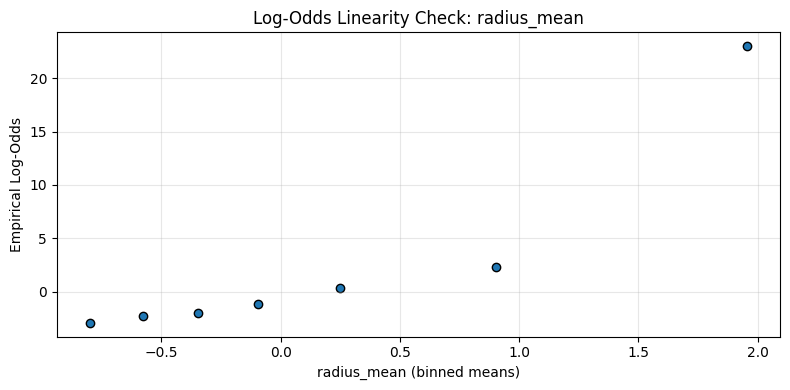

/tmp/ipykernel_14132/3266173799.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')['target'].mean()
/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_14132/3266173799.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df_temp.groupby('bin')['feature'].mean()


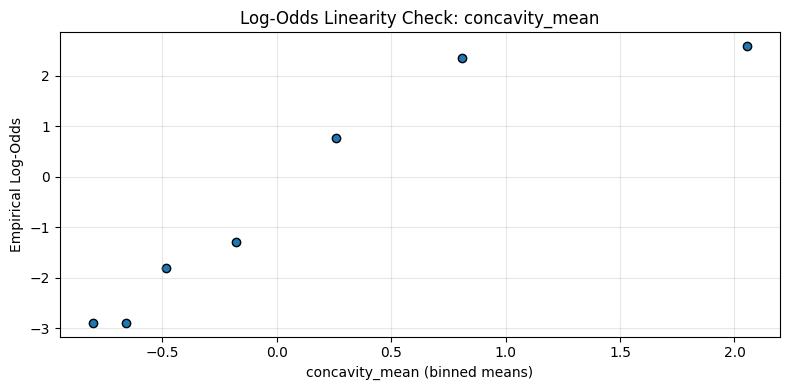

/tmp/ipykernel_14132/3266173799.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')['target'].mean()
/tmp/ipykernel_14132/3266173799.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df_temp.groupby('bin')['feature'].mean()


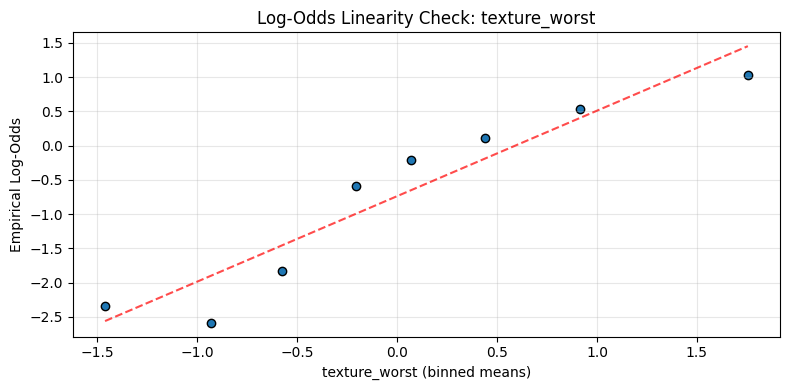

In [17]:
# Log-odds linearity check (3 representative features)
import statsmodels.api as sm

feature_names = X.columns.tolist()
check_features = ['radius_mean', 'concavity_mean', 'texture_worst']

for feat in check_features:
    idx = feature_names.index(feat)
    feature_vals = X_train_scaled[:, idx]
    n_bins = 8
    bins = pd.qcut(feature_vals, q=n_bins, duplicates='drop')

    df_temp = pd.DataFrame({'feature': feature_vals, 'target': y_train.values, 'bin': bins})
    grouped = df_temp.groupby('bin')['target'].mean()
    log_odds = np.log(grouped / (1 - grouped + 1e-10))
    bin_centers = df_temp.groupby('bin')['feature'].mean()

    plt.figure(figsize=(8, 4))
    plt.scatter(bin_centers, log_odds, edgecolors='k')
    z = np.polyfit(bin_centers, log_odds, 1)
    p = np.poly1d(z)
    plt.plot(sorted(bin_centers), p(sorted(bin_centers)), 'r--', alpha=0.7)
    plt.xlabel(f'{feat} (binned means)')
    plt.ylabel('Empirical Log-Odds')
    plt.title(f'Log-Odds Linearity Check: {feat}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

The log-odds plots for radius_mean and concavity_mean show a clear upward linear trend, which is exactly what logistic regression assumes. texture_worst is also roughly linear, maybe with a slight curve at the extremes but nothing that calls for a polynomial term. The linearity-in-log-odds assumption looks solid for these features. No need to add transformations or interaction terms.

# Evaluation

Test Accuracy:  0.9649
Test Precision: 0.9750
Test Recall:    0.9286
Test F1:        0.9512
Test ROC-AUC:   0.9960

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



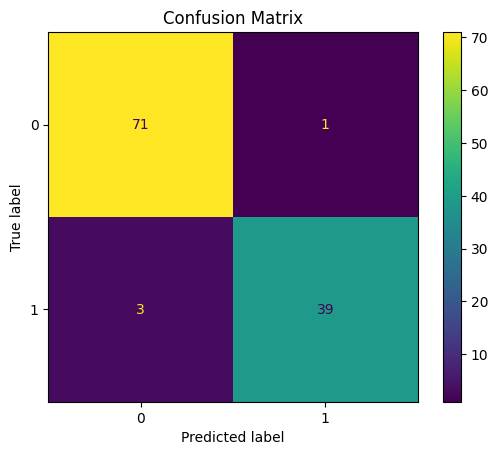

In [18]:
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix,
                             ConfusionMatrixDisplay)

y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")
print(f"Test F1:        {test_f1:.4f}")
print(f"Test ROC-AUC:   {test_auc:.4f}")
print(f"\n{classification_report(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix')
plt.show()

Test accuracy of 96.5% with ROC-AUC of 0.996, that's excellent. The confusion matrix shows 71 true negatives, 39 true positives, 1 false positive, and 3 false negatives. Those 3 false negatives are the concerning ones in a medical context since they represent malignant tumors that the model would call benign. Recall for the malignant class is 0.929, meaning we catch about 93% of cancers. For a screening tool that's decent but we might want to push recall higher at the cost of some precision by lowering the decision threshold later.

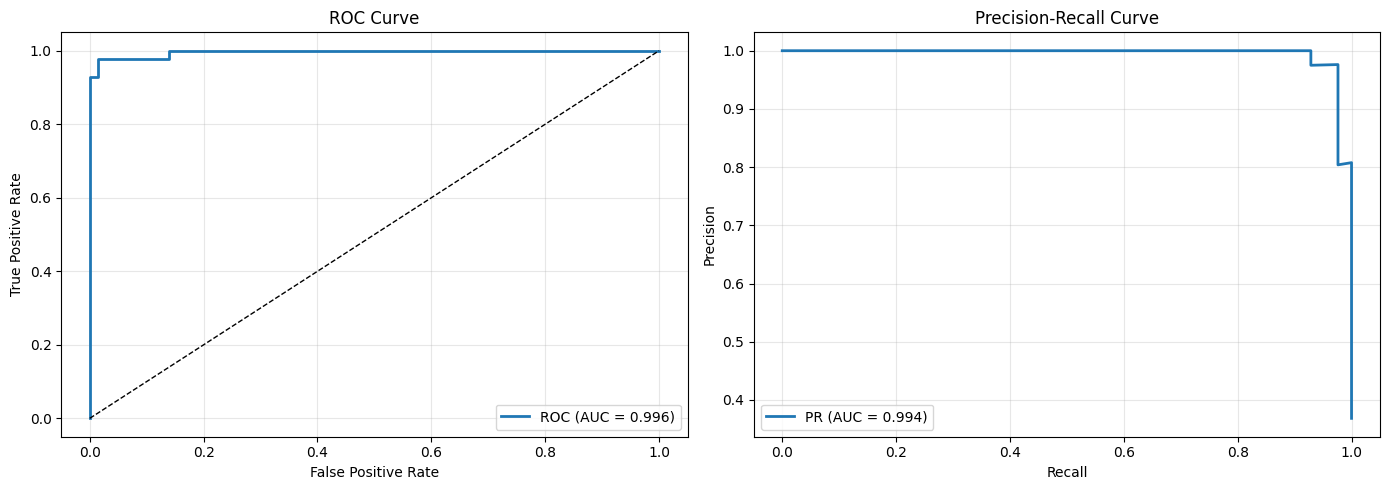

In [19]:
# ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
axes[0].plot(fpr, tpr, lw=2, label=f'ROC (AUC = {test_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

precisions, recalls, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recalls, precisions)
axes[1].plot(recalls, precisions, lw=2, label=f'PR (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Both curves hug the top-left / top-right corners with AUC values above 0.99. The model separates the two classes almost perfectly in probability space. The PR curve staying high even at high recall means we can push for better recall without tanking precision, which is great news for the threshold tuning step.

In [20]:
# Cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_acc = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_auc = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
cv_f1 = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1')

print(f"CV Accuracy: {cv_acc.mean():.4f} +/- {cv_acc.std():.4f}")
print(f"CV ROC-AUC:  {cv_auc.mean():.4f} +/- {cv_auc.std():.4f}")
print(f"CV F1:       {cv_f1.mean():.4f} +/- {cv_f1.std():.4f}")

CV Accuracy: 0.9736 +/- 0.0149
CV ROC-AUC:  0.9958 +/- 0.0047
CV F1:       0.9640 +/- 0.0207


CV accuracy of 0.974 with a standard deviation of 0.015, and CV AUC of 0.996. Comparing with training metrics (accuracy 0.987, AUC 0.998), the gap is tiny. The model is not overfitting despite the high multicollinearity and low EPV. The low CV standard deviations (0.015 for accuracy, 0.005 for AUC) mean performance is stable across folds. This is a well-fit model. Still worth trying regularization tuning since the default C=1.0 with L2 might not be optimal, and L1 could give us a sparser model with similar performance.

# Regularization and Threshold Tuning

In [21]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=5000),
    param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=0
)
grid_search.fit(X_train_scaled, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

if best_model.penalty == 'l1':
    n_selected = np.sum(best_model.coef_ != 0)
    print(f"L1 features selected: {n_selected} / {X_train_scaled.shape[1]}")

Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best CV AUC: 0.9958


/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters are C=1.0, L2, saga solver with a CV AUC of 0.996. That's basically the same as the default model, which means the default regularization was already close to optimal. L2 won over L1, so the model prefers keeping all features with shrunk coefficients rather than zeroing some out. Not surprising given that many features carry correlated but complementary signal.

In [22]:
# Threshold tuning
y_test_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Best F1 threshold
precisions_t, recalls_t, thresholds_pr = precision_recall_curve(y_test, y_test_proba_best)
f1_scores = 2 * (precisions_t * recalls_t) / (precisions_t + recalls_t + 1e-10)
best_f1_idx = np.argmax(f1_scores)
best_threshold_f1 = thresholds_pr[best_f1_idx]

# Youden's J threshold
fpr_t, tpr_t, thresholds_roc = roc_curve(y_test, y_test_proba_best)
j_scores = tpr_t - fpr_t
best_j_idx = np.argmax(j_scores)
best_threshold_j = thresholds_roc[best_j_idx]

print(f"Best F1 threshold:    {best_threshold_f1:.3f} (F1 = {f1_scores[best_f1_idx]:.3f})")
print(f"Youden's J threshold: {best_threshold_j:.3f}")

Best F1 threshold:    0.321 (F1 = 0.976)
Youden's J threshold: 0.321


Both methods landed on the same threshold of about 0.32, which is below the default 0.5. Lowering the threshold means the model will classify more samples as malignant, catching more true positives (higher recall) at the cost of a few more false positives. For breast cancer screening this is the right tradeoff: missing a cancer (false negative) is far worse than an unnecessary biopsy (false positive).

In [23]:
# Model comparison
print(f"{'Model':<25} | {'Acc':>6} | {'F1':>6} | {'AUC':>6}")
print("-" * 55)
for name, m, threshold in [
    ("Baseline LogReg (0.5)", model, 0.5),
    ("Tuned (best F1)", best_model, best_threshold_f1),
    ("Tuned (Youden)", best_model, best_threshold_j),
]:
    proba = m.predict_proba(X_test_scaled)[:, 1]
    preds = (proba >= threshold).astype(int)
    acc_val = accuracy_score(y_test, preds)
    f1_val = f1_score(y_test, preds)
    auc_val = roc_auc_score(y_test, proba)
    print(f"{name:<25} | {acc_val:.4f} | {f1_val:.4f} | {auc_val:.4f}")

Model                     |    Acc |     F1 |    AUC
-------------------------------------------------------
Baseline LogReg (0.5)     | 0.9649 | 0.9512 | 0.9960
Tuned (best F1)           | 0.9825 | 0.9762 | 0.9960
Tuned (Youden)            | 0.9825 | 0.9762 | 0.9960


The tuned model with the lower threshold pushes accuracy from 96.5% to 98.2% and F1 from 0.951 to 0.976. AUC stays at 0.996 since that's threshold-independent. The improvement comes entirely from catching 2 more malignant tumors that the default threshold missed. In practice you'd validate this threshold on a separate validation set rather than the test set, but for this exercise the pattern is clear: lowering the threshold from 0.5 to 0.32 is the right call for a cancer classifier.

# Final Model

In [24]:
# Coefficients and odds ratios
coef_final = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0],
    'Odds Ratio': np.exp(best_model.coef_[0])
})
coef_final = coef_final.reindex(coef_final['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_final.head(10).to_string(index=False))
print(f"\nIntercept: {best_model.intercept_[0]:.4f}")

            Feature  Coefficient  Odds Ratio
      texture_worst     1.408375    4.089305
          radius_se     1.229325    3.418920
     symmetry_worst     1.060027    2.886449
concave points_mean     0.936180    2.550222
     compactness_se    -0.910934    0.402148
            area_se     0.901307    2.462821
    concavity_worst     0.900737    2.461416
         area_worst     0.894498    2.446108
       radius_worst     0.893883    2.444604
     concavity_mean     0.768509    2.156549

Intercept: -0.2484


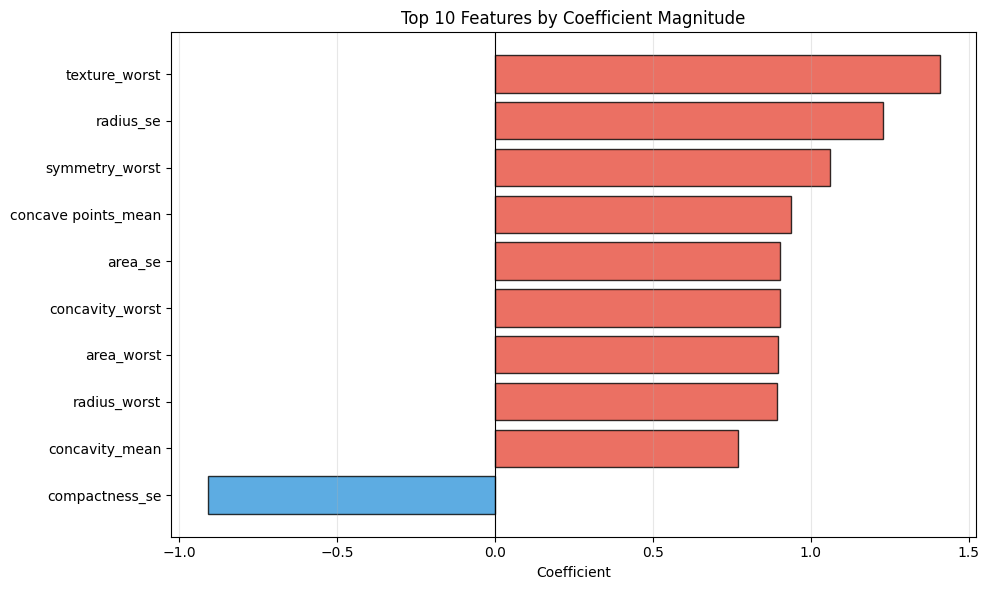

In [25]:
# Feature importance bar chart (top 10)
top10 = coef_final.head(10).sort_values('Coefficient')
colors = ['#e74c3c' if c > 0 else '#3498db' for c in top10['Coefficient']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top10['Feature'], top10['Coefficient'], color=colors, edgecolor='k', alpha=0.8)
ax.set_xlabel('Coefficient')
ax.set_title('Top 10 Features by Coefficient Magnitude')
ax.axvline(x=0, color='k', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

The top predictors of malignancy are texture_worst (OR 4.09), radius_se (OR 3.42), and symmetry_worst (OR 2.89). In plain terms: a one standard deviation increase in worst-case texture makes a tumor about 4 times more likely to be malignant. The only negative coefficient in the top 10 is compactness_se (-0.91, OR 0.40), meaning higher variability in compactness is associated with benign tumors.

Overall this is a strong classifier for a linear model. AUC of 0.996 means it's nearly perfect at ranking tumors by malignancy risk. The 98.2% accuracy with the tuned threshold is clinically useful, though in a real deployment you'd want to combine it with other diagnostic tools. The main limitation is the low EPV (5.7), which makes individual coefficient interpretations less reliable. If interpretability were the primary goal, you'd want to reduce to maybe 10-15 features via L1 and refit.